In [5]:
import math
import os

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pybamm

import utils as ssb_utils

In [6]:
# When model developed further, use for experiment
Molel2021 = {
    "chemistry": "lithium-ion",
    "cell": "LGM50_Chen2020",
    "negative electrode": "graphite_Chen2020", # update to lithium_Molel2021
    "separator": "separator_Chen2020",  # dimensions should be set to 0
    "positive electrode": "nmc_Chen2020",
    "electrolyte": "lipf6_Nyman2008",
    "experiment": "1C_discharge_from_full_Chen2020",  # update to 1C_discharge_from_full_Molel2021
    "sei": "example",
    "citation": "Chen2020",  # update to (Molel2021)
}

Widget Javascript not detected.  It may not be installed or enabled properly.


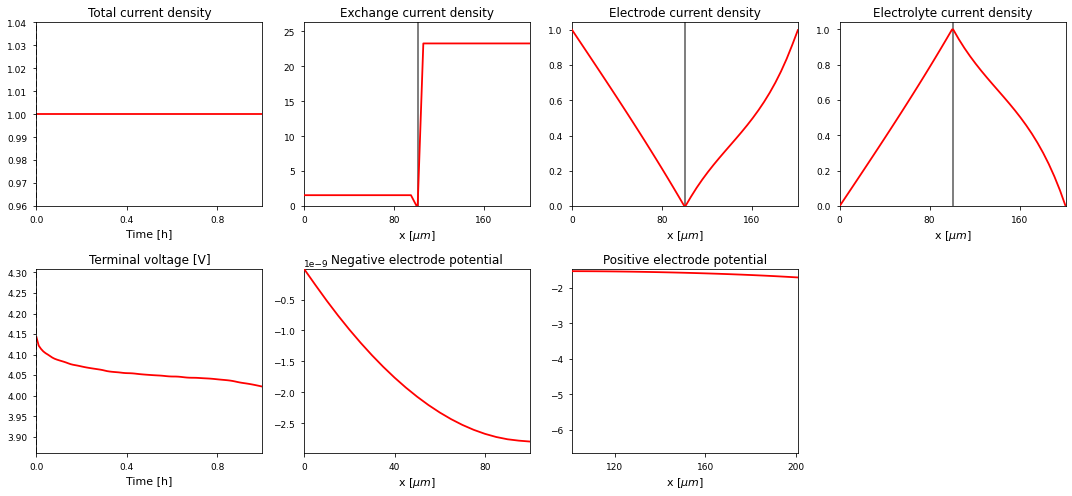

In [13]:
params = ssb_utils.load_all_params()
parameters = pybamm.ParameterValues(values=params)
options = {'operating mode': 'current', 'dimensionality': 0, 'surface form': 'false', 'convection': 'none',
           'side reactions': [], 'interfacial surface area': 'constant', 'current collector': 'uniform',
           'particle': 'Fickian diffusion', 'particle shape': 'spherical', 'electrolyte conductivity': 'default',
           'thermal': 'isothermal', 'cell geometry': 'arbitrary', 'external submodels': [], 'SEI': 'none',
           'lithium plating': 'none', 'SEI porosity change': 'false', 'lithium plating porosity change': 'false',
           'loss of active material': 'none', 'working electrode': 'none', 'particle cracking': 'none',
           'total interfacial current density as a state': 'false', 'SEI film resistance': 'none'
          }
model = pybamm.lithium_ion.DFN(options=options)
sim = pybamm.Simulation(model=model, parameter_values=parameters)
sim.solve([0, 3600])
plots = ["Total current density", "Exchange current density", "Electrode current density", "Electrolyte current density",
    "Terminal voltage [V]", "Negative electrode potential", "Positive electrode potential"]
sim.plot(plots)